In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
beers = pd.read_csv('beer_reviews.csv')

In [3]:
beers.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [4]:
beers.shape

(1586614, 13)

In [5]:
beers.dtypes # Bajar nivel de cada type de columna para ocupar menos espacio de memoria

brewery_id              int64
brewery_name           object
review_time             int64
review_overall        float64
review_aroma          float64
review_appearance     float64
review_profilename     object
beer_style             object
review_palate         float64
review_taste          float64
beer_name              object
beer_abv              float64
beer_beerid             int64
dtype: object

In [6]:
for e in beers.select_dtypes('integer').columns:
    beers[e] = pd.to_numeric(beers[e], downcast = 'integer')
    
beers.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586614 non-null  int16  
 1   brewery_name        1586599 non-null  object 
 2   review_time         1586614 non-null  int32  
 3   review_overall      1586614 non-null  float64
 4   review_aroma        1586614 non-null  float64
 5   review_appearance   1586614 non-null  float64
 6   review_profilename  1586266 non-null  object 
 7   beer_style          1586614 non-null  object 
 8   review_palate       1586614 non-null  float64
 9   review_taste        1586614 non-null  float64
 10  beer_name           1586614 non-null  object 
 11  beer_abv            1518829 non-null  float64
 12  beer_beerid         1586614 non-null  int32  
dtypes: float64(6), int16(1), int32(2), object(4)
memory usage: 544.2 MB


In [7]:
for e in beers.select_dtypes('float').columns:
    beers[e] = pd.to_numeric(beers[e], downcast = 'float')
    
beers.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586614 non-null  int16  
 1   brewery_name        1586599 non-null  object 
 2   review_time         1586614 non-null  int32  
 3   review_overall      1586614 non-null  float32
 4   review_aroma        1586614 non-null  float32
 5   review_appearance   1586614 non-null  float32
 6   review_profilename  1586266 non-null  object 
 7   beer_style          1586614 non-null  object 
 8   review_palate       1586614 non-null  float32
 9   review_taste        1586614 non-null  float32
 10  beer_name           1586614 non-null  object 
 11  beer_abv            1518829 non-null  float32
 12  beer_beerid         1586614 non-null  int32  
dtypes: float32(6), int16(1), int32(2), object(4)
memory usage: 507.9 MB


In [8]:
beers.isna().sum() # Por la cantidad que representan los valores nulos de la columna beer_abv (4%) en comparación con el dataframe
                    # se pueden eliminar, debido a que no existe una forma de poder sustituir estos valores, ya que es el valor
                    # de volumen de alcohol que contiene la cerveza y esta varía en cada estílo de cerveza y cervecería.
        # Por otra parte, también se dropearán los valores NaN de las columnas review_profilename y brewery_name que tampoco
        # se pueden sustituir con algún valor determinándolo por otra información que nos proporcione nuestro dataframe y son
        # muy pocos valores los eliminados en comparación con toda la información que tenemos

brewery_id                0
brewery_name             15
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67785
beer_beerid               0
dtype: int64

In [9]:
beers.dropna(inplace=True)

In [10]:
beers.isna().sum()

brewery_id            0
brewery_name          0
review_time           0
review_overall        0
review_aroma          0
review_appearance     0
review_profilename    0
beer_style            0
review_palate         0
review_taste          0
beer_name             0
beer_abv              0
beer_beerid           0
dtype: int64

In [11]:
beers.shape

(1518478, 13)

In [12]:
beers.describe() # Checamos la estadística que nos arroja nuestro dataframe

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,1.518478e+06,1.518478e+06,1.518478e+06,1.518478e+06,1.518478e+06,1.518478e+06,1.518478e+06,1.518478e+06,1.518478e+06
mean,3.074306e+03,1.225332e+09,3.823937e+00,3.746218e+00,3.850383e+00,3.753735e+00,3.804082e+00,7.036302e+00,2.140575e+04
std,5.544339e+03,7.583455e+07,7.148814e-01,6.951998e-01,6.156175e-01,6.795034e-01,7.279967e-01,2.321689e+00,2.178033e+04
min,1.000000e+00,8.406720e+08,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,5.000000e+00
25%,1.410000e+02,1.175562e+09,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,5.200000e+00,1.654000e+03
50%,4.170000e+02,1.240356e+09,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.500000e+00,1.283000e+04
75%,2.298000e+03,1.289086e+09,4.500000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.500000e+00,8.500000e+00,3.923600e+04
max,2.800300e+04,1.326285e+09,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.770000e+01,7.731600e+04


In [13]:
beers.beer_abv.value_counts() # Se estructura esta parte para quedarnos con valores decimales

5.00    109116
8.00     67730
6.00     65375
7.00     59446
9.00     59171
         ...  
5.32         1
5.82         1
5.85         1
5.87         1
5.48         1
Name: beer_abv, Length: 530, dtype: int64

In [14]:
beers['beer_abv'] = beers['beer_abv'].round(1)

In [15]:
beers['beer_abv'].value_counts() 

5.000000     110434
8.000000      67778
6.000000      65948
5.500000      59698
7.000000      59494
              ...  
1.400000          1
30.900000         1
1.300000          1
57.700001         1
16.100000         1
Name: beer_abv, Length: 190, dtype: int64

In [16]:
beers.brewery_name.value_counts() # Utilizar función para encontrar si existen palabras similares para evitar que estén mal escritas

Boston Beer Company (Samuel Adams)    38806
Dogfish Head Brewery                  33790
Stone Brewing Co.                     33009
Sierra Nevada Brewing Co.             28632
Bell's Brewery, Inc.                  24973
                                      ...  
SandLot Brewery @ Coors Field             1
Benderskiy Pivovarinniy Zavod             1
Brass Monkey Brewing Co.                  1
Erve Kots Brouwerij                       1
Calhoun's Microbrewery                    1
Name: brewery_name, Length: 5155, dtype: int64

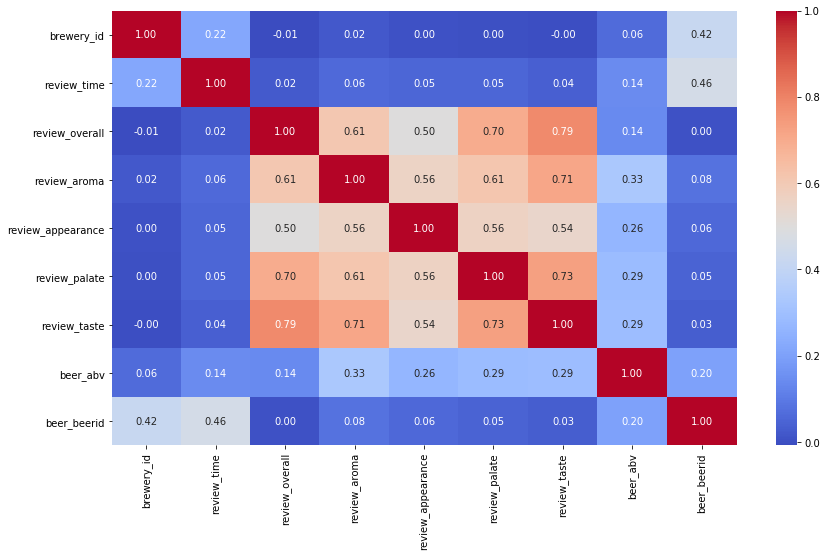

In [17]:
# Se realiza un mapeo de correlación para saber si existen columnas con un alto grado de correlación
a4_dims = (14, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(beers.corr(),cmap='coolwarm', annot=True, fmt='.2f')

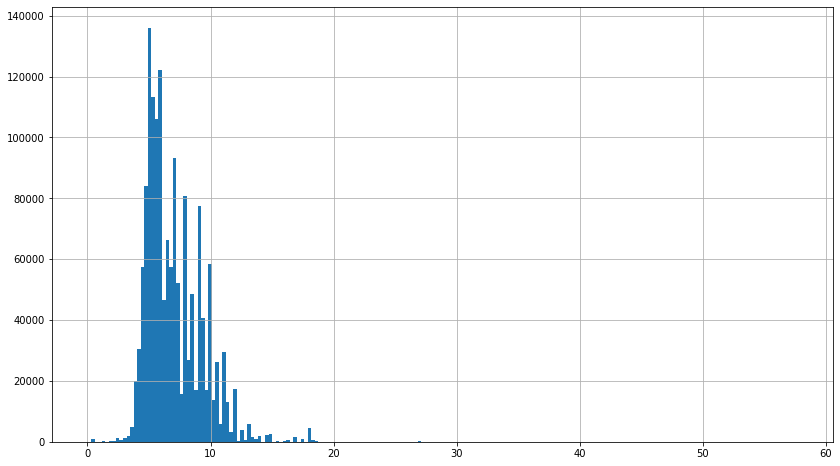

<Figure size 432x288 with 0 Axes>

In [18]:
# Se plotea la columna de beer_abv que hace referencia al volumen de alcohol en las cervezas para saber en dónde se concentra 
# el mayor número de información y poder determinar si se acorta nuestra base o se mantiene con esta información
fig,axes = plt.subplots(figsize = (14,8), nrows = 1, ncols = 1)
plt.hist(beers.beer_abv, bins=200)
plt.grid(True)
plt.show()
plt.clf()

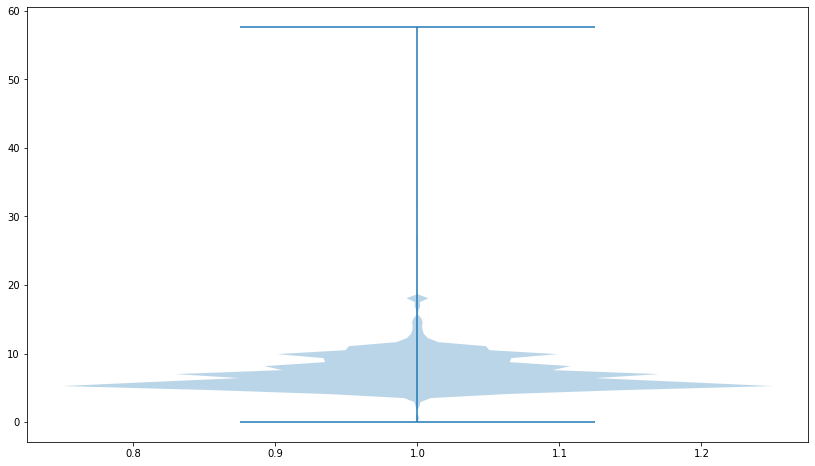

In [19]:
a4_dims = (14, 8) # Por lo que se puede apreciar, podemos detarminar quedarnos solamente con los valores en donde se concentra 
                    # mayor la información, que en este caso sería del valor 0 al 20, pero al tratarse de un sistema de 
                    # recomendación puede haber usuarios que tengan gusto por este tipo de cervezas con abv muy elevados y es 
                    # ello que no podemos discriminar esta información.
fig, ax = plt.subplots(figsize=a4_dims)
plt.violinplot(beers.beer_abv)
plt.show();

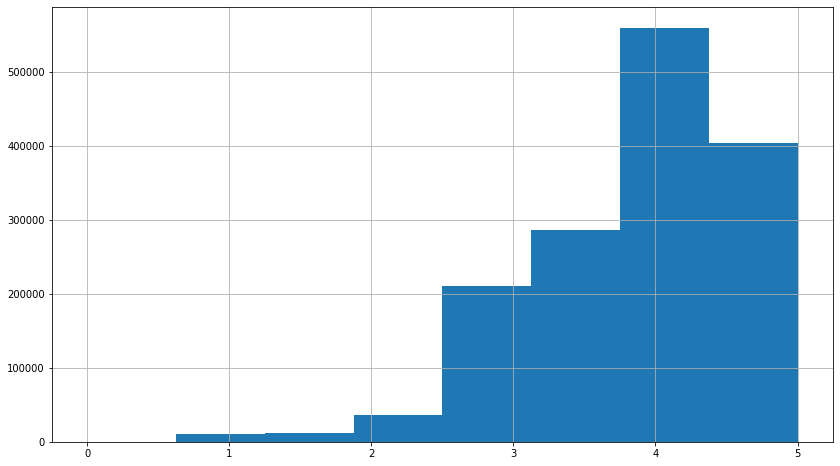

<Figure size 432x288 with 0 Axes>

In [20]:
# Esta columna de review_overall se convertirá en nuestra referencia de rating para el sistema de recomendación
fig,axes = plt.subplots(figsize = (14,8), nrows = 1, ncols = 1)
plt.hist(beers['review_overall'], bins=8)
plt.grid(True)
plt.show()
plt.clf()

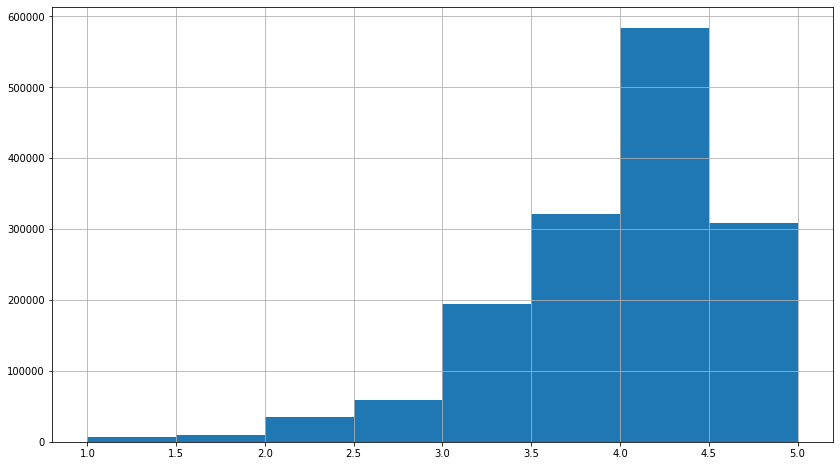

<Figure size 432x288 with 0 Axes>

In [21]:
fig,axes = plt.subplots(figsize = (14,8), nrows = 1, ncols = 1)
plt.hist(beers['review_palate'], bins=8)
plt.grid(True)
plt.show()
plt.clf()

In [22]:
beers.brewery_id.value_counts() # Realizar lo mismo (asignarle valor numérico, columna brewery_id coincide con brewery_name) 
                                # en las columnas review_profilename, beer_style y beer_name

35       38806
10099    33790
147      33009
140      28632
287      24973
         ...  
19749        1
5422         1
23648        1
16293        1
3394         1
Name: brewery_id, Length: 5230, dtype: int64

In [23]:
beers['review_profilename'] = beers['review_profilename'].astype('category')

In [24]:
beers["review_profileid"] = beers['review_profilename'].cat.codes
beers.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,review_profileid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986,30121
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213,30121
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215,30121
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969,30121
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883,22693


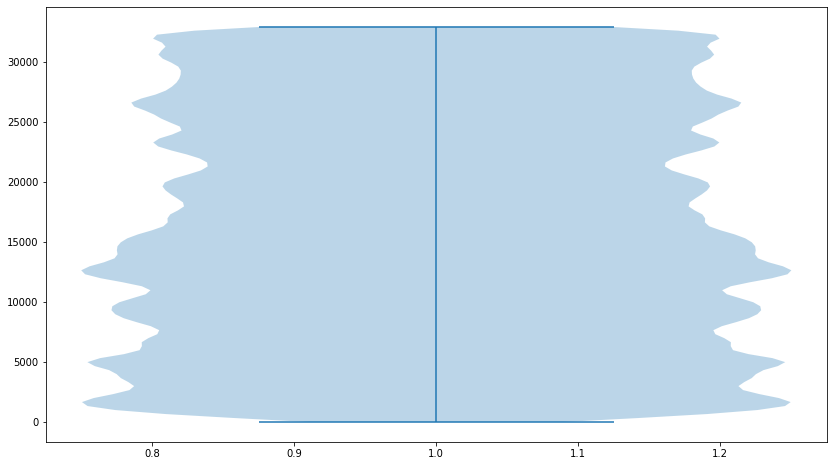

In [25]:
a4_dims = (14, 8) 

fig, ax = plt.subplots(figsize=a4_dims)
plt.violinplot(beers['review_profileid'])
plt.show();

In [26]:
beers['beer_style'] = beers['beer_style'].astype('category')

beers["beer_styleid"] = beers['beer_style'].cat.codes
beers.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,review_profileid,beer_styleid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986,30121,65
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213,30121,51
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215,30121,59
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969,30121,61
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883,22693,9


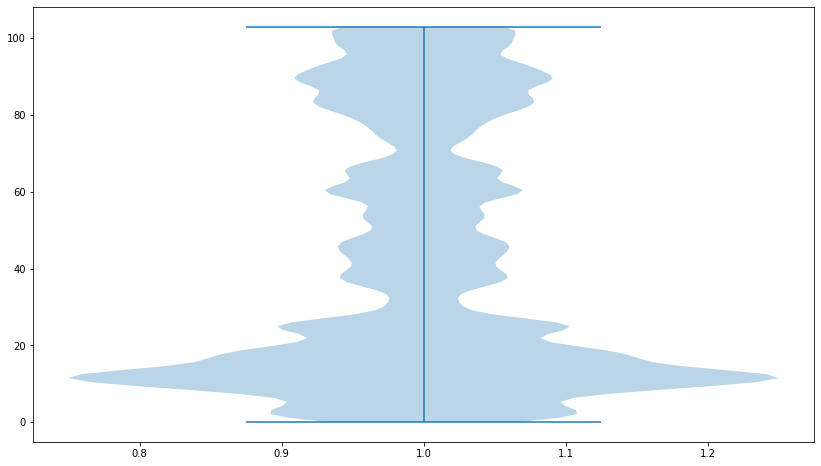

In [27]:
a4_dims = (14, 8) 

fig, ax = plt.subplots(figsize=a4_dims)
plt.violinplot(beers['beer_styleid'])
plt.show();

In [28]:
beers['beer_name'] = beers['beer_name'].astype('category')

beers["beer_nameid"] = beers['beer_name'].cat.codes
beers.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,review_profileid,beer_styleid,beer_nameid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986,30121,65,34371
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213,30121,51,32297
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215,30121,59,5313
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969,30121,61,34370
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883,22693,9,8745


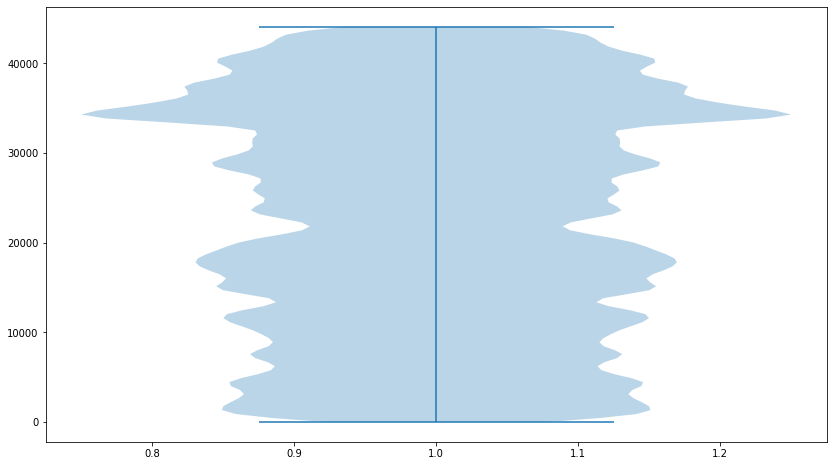

In [29]:
a4_dims = (14, 8) 

fig, ax = plt.subplots(figsize=a4_dims)
plt.violinplot(beers['beer_nameid'])
plt.show();

In [30]:
# Se eliminan las columnas 'beer_beerid' y  'review_time' porque no nos aportan información que necesitamos para nuestro sistema

beers.drop(['beer_beerid', 'review_time'], axis=1, inplace=True)

In [31]:
beers.head()

,brewery_id,brewery_name,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,review_profileid,beer_styleid,beer_nameid
0,10325,Vecchio Birraio,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,30121,65,34371
1,10325,Vecchio Birraio,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,30121,51,32297
2,10325,Vecchio Birraio,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,30121,59,5313
3,10325,Vecchio Birraio,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,30121,61,34370
4,1075,Caldera Brewing Company,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,22693,9,8745


In [32]:
# Se estructura de mejor manera el orden de nuestras columnas para que sa una mejor manera de entender nuestro Dataframe
beers = beers.reindex(columns=['brewery_name', 'brewery_id', 'beer_style', 'beer_styleid', 'beer_name', 'beer_nameid', 
                               'beer_abv', 'review_profilename', 'review_profileid', 'review_overall', 'review_aroma',
                               'review_appearance', 'review_palate','review_taste'])

In [33]:
beers.head()

,brewery_name,brewery_id,beer_style,beer_styleid,beer_name,beer_nameid,beer_abv,review_profilename,review_profileid,review_overall,review_aroma,review_appearance,review_palate,review_taste
0,Vecchio Birraio,10325,Hefeweizen,65,Sausa Weizen,34371,5.0,stcules,30121,1.5,2.0,2.5,1.5,1.5
1,Vecchio Birraio,10325,English Strong Ale,51,Red Moon,32297,6.2,stcules,30121,3.0,2.5,3.0,3.0,3.0
2,Vecchio Birraio,10325,Foreign / Export Stout,59,Black Horse Black Beer,5313,6.5,stcules,30121,3.0,2.5,3.0,3.0,3.0
3,Vecchio Birraio,10325,German Pilsener,61,Sausa Pils,34370,5.0,stcules,30121,3.0,3.0,3.5,2.5,3.0
4,Caldera Brewing Company,1075,American Double / Imperial IPA,9,Cauldron DIPA,8745,7.7,johnmichaelsen,22693,4.0,4.5,4.0,4.0,4.5


In [34]:
# Una vez limpia y estructurada nuestra data se procede a tomar una muestra aleatoria de la tercera parte para comenzar a hacer
# pruebas del sistema de recomendación
df2 = beers.sample(n=500000)

In [35]:
df2.reset_index().head()

,index,brewery_name,brewery_id,beer_style,beer_styleid,beer_name,beer_nameid,beer_abv,review_profilename,review_profileid,review_overall,review_aroma,review_appearance,review_palate,review_taste
0,537912,Terrapin Beer Company,2372,American IPA,12,Terrapin Hopsecutioner,38929,7.3,MacQ32,7807,4.0,4.0,4.0,4.0,4.0
1,310465,Boston Beer Company (Samuel Adams),35,Herbed / Spiced Beer,66,Brewer Patriot Collection - 1790 Root Beer Brew,6980,5.5,SteveO1231,11381,2.0,2.5,3.0,2.5,2.0
2,281158,Boston Beer Company (Samuel Adams),35,Vienna Lager,99,Samuel Adams Boston Lager,34013,4.9,hoegaardenhero,20979,3.0,3.5,3.5,3.5,3.0
3,1060689,Heavyweight Brewing Co.,393,Extra Special / Strong Bitter (ESB),55,Doug's Colonial Ale,12190,4.7,guinness33,20603,5.0,5.0,4.0,4.5,4.5
4,780620,Surly Brewing Company,13014,Rye Beer,90,SurlyFest,38293,6.0,kbutler1,23289,4.0,4.0,4.0,4.0,4.0


In [36]:
df2.groupby(["review_overall"])["review_profileid"].count()

review_overall
0.0         3
1.0      3341
1.5      3996
2.0     11819
2.5     17911
3.0     51320
3.5     94587
4.0    184280
4.5    103446
5.0     29297
Name: review_profileid, dtype: int64

In [37]:
df2['review_overall'].value_counts()

4.0    184280
4.5    103446
3.5     94587
3.0     51320
5.0     29297
2.5     17911
2.0     11819
1.5      3996
1.0      3341
0.0         3
Name: review_overall, dtype: int64

In [38]:
df = beers.sample(n=5000)

In [40]:
df.reset_index().head()

,index,brewery_name,brewery_id,beer_style,beer_styleid,beer_name,beer_nameid,beer_abv,review_profilename,review_profileid,review_overall,review_aroma,review_appearance,review_palate,review_taste
0,1163433,Dogfish Head Brewery,10099,Lambic - Fruit,74,Festina Lente,14194,7.0,UnionMade,12623,3.5,4.0,3.5,4.0,4.5
1,1058525,Mendocino Brewing Company,200,American Strong Ale,19,Eye of the Hawk,13791,8.0,Andreji,639,3.5,4.0,4.0,4.0,4.0
2,809298,Fish Brewing Company / Fishbowl Brewpub,684,American Barleywine,4,Fish Tale Leviathan Barleywine,14421,10.0,jera1350,22153,4.0,4.0,4.5,4.0,4.0
3,168430,Bear Republic Brewing Co.,610,American IPA,12,Racer 5 India Pale Ale,31767,7.0,warriorsoul,32080,5.0,4.0,4.0,4.0,4.5
4,748056,BrewDog,16315,Extra Special / Strong Bitter (ESB),55,The Physics,39324,5.0,Brad007,2028,4.0,3.5,4.0,4.0,4.0


In [41]:
df_matrix = pd.pivot_table(df, values='review_overall', index='review_profileid', columns='beer_nameid').fillna(0)
df_matrix

beer_nameid,36,41,45,81,85,105,108,131,137,143,...,43810,43821,43892,43905,43964,43969,43971,44004,44027,44054
review_profileid,,,,,,,,,,,,,,,,,,,,,
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32863,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32874,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
ratings = df_matrix.values
sparsity = float(len(ratings.nonzero()[0]))
sparsity /= (ratings.shape[0] * ratings.shape[1])
sparsity *= 100
print('Sparsity: {:4.2f}%'.format(sparsity))

Sparsity: 0.06%


In [45]:
from sklearn.model_selection import train_test_split as tts

ratings_train, ratings_test = tts(ratings, test_size = 0.2, random_state=42)
print(ratings_train.shape)
print(ratings_test.shape)

(2192, 3011)
(548, 3011)
